<a href="https://colab.research.google.com/github/guscldns/TestProject/blob/main/%EA%B8%B0%EC%B4%88%ED%86%B5%EA%B3%84/02_optimization_blank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


# numpy 출력 형식 지정
np.set_printoptions(precision=4, linewidth=150)

In [ ]:
# 아래 셀이 에러나면 다음 주석을 풀고 실행후 아래 셀 다시 실행
# !pip install --upgrade gdown

In [ ]:
# 런타임에 hidden_func.py를 업로드하고 모듈을 임포트 한다.

!gdown --id 1yEcX08jCu49OkvhyqaH1tPScYuRBiHnC

from hidden_func import hidden_f

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1yEcX08jCu49OkvhyqaH1tPScYuRBiHnC
To: /content/hidden_func.py
100% 42.0/42.0 [00:00<00:00, 112kB/s]


## 선탐색을 위한 1차원 함수

- 경사도 벡터가 정의되면 그 경사도 벡터 방향으로 변수를 변화시키면 주어진 목적함수는 일변수화 되게 됩니다.

- 아래 코드는 이변수 함수 `f(X)`를 일변수 함수화 시켜서 실험을 하는 코드입니다. `f_alpha`는 전역으로 `f(X)`를 참조해서 `d`방향으로 일변수 함수값을 계산합니다.

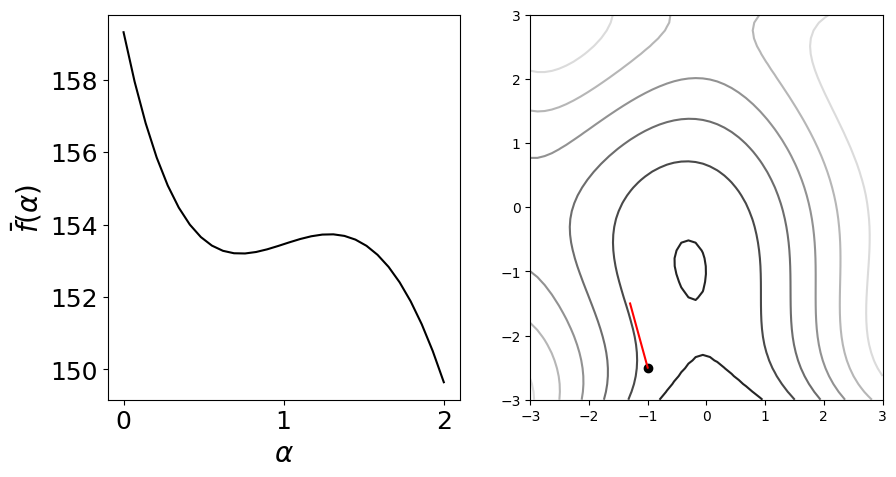

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax[0].xaxis.set_tick_params(labelsize=18)
ax[0].yaxis.set_tick_params(labelsize=18)
ax[0].set_xlabel('$x$', fontsize=25)
ax[0].set_ylabel('$y$', fontsize=25)
ax[0].grid(False)

def f(X):
    # https://machinelearningmastery.com/2d-test-functions-for-function-optimization/
    return (X[0]**2 + X[1] - 11)**2 + (X[0] + X[1]**2 -7)**2


################################################################################
# 2차원 함수를 1차원 함수로 전환하는 함수를 완성하기
#
x_0 = np.array([-1, -2.5]) # 시작점
d   = np.array([-0.3, 1])  # 탐색 방향

def f_alpha(a):
    """
    global var.: f(X):이변수 스칼라 함수, x_0:(1,2), d:(1,2)
    a: (n,) x_0, d와 적당히 브로드캐스팅되어야 함

    반환: f(x_0 + a*d)
    """
    ##################################
    # WRITE YOUR CODE HERE
    # x_0에서부터 방향 d로 진행하는 1차원 함수의 값을
    # 구하는 코드를 적어보세요.
    # 이 코드를 적는 이유는 아무리 차원이 높은 변수 x_0에 대해서도
    # d가 지정되면 a에 대한 일변수 함수라는 것을 확실히
    # 느껴보기 위함입니다.
    #
    # 단 x_0는 (1,2), d도 (1,2)이므로 a: (n,)에 대해서
    # 모두 계산되도록 브로드캐스팅을 이용하세요.
    return f(x_0.reshape(2,1) + a*d.reshape(2,1))

################################################################################

alphas = np.linspace(0, 2, 30)
ax[0].plot(alphas, f_alpha(alphas), 'k')
ax[0].set_xlabel(r'$\alpha$', fontsize=20)
ax[0].set_ylabel(r'$\bar{f}(\alpha)$', fontsize=20)

x1 = np.linspace(-3, 3, 50)
x2 = np.linspace(-3, 3, 50)
X1, X2 = np.meshgrid(x1, x2)
ax[1].contour(X1, X2, f(np.array([X1,X2])), cmap=plt.cm.binary, linestyles="solid")
ax[1].plot(x_0[0], x_0[1], 'o', color='k')
ax[1].plot([x_0[0], x_0[0]+d[0]],[x_0[1], x_0[1]+d[1]], color='r')
plt.show()

### 선탐색 함수: 황금분할 탐색법 Golden Section Search

- 아래는 앞서 알아본 1차원 함수 $f(\alpha)$와 1차원 선탐색 함수인 황금분할 탐색법을 코딩한 코드입니다.
- 선탐색 알고리즘은 매우 다양하고 실제로 딥러닝에서는 선탐색을 하지 않으므로 여기서 황금분할 탐색 코드를 분석할 필요는 없습니다.

In [ ]:
def f_alpha(alpha, fun, x, s, args=()) :
    """
    This is a one-dimensional version of the objective function
    given by the parameter alpha

    alpha : 1D independent variable
    fun   : Original objective function
    x     : Start point
    s     : 1D search direction
    args  : Tuple extra arguments passed to the objective function
    """

    # 여기서는
    # 한번에 하나의 alpha에 대해서만 값을 계산하기 때문에
    # 브로드캐스팅을 하지 않습니다.
    x_new = x + alpha * s

    return fun(x_new, *args)

def gss(fun, dfun, x, s, args=(), delta=1.0e-2, tol=1e-15):
    '''
    Line search function by golden section search
    https://en.wikipedia.org/wiki/Golden-section_search and [arora]

    fun   : Original objective function
    dfun  : Objective function gradient which is not used
    x     : Start point
    s     : 1D search directin
    args  : Tuple extra arguments passed to the objective function
    delta : Init. guess interval determining initial interval of uncertainty
    tol   : stop criterion
    '''
    gr = (np.sqrt(5) + 1) / 2

    ########################################################################################
    # ESTABLISH INITIAL DELTA
    # 초기 delta를 잡는다.
    # alpah = 0에서 값과 delta에서의 함수값을 계산하고 delta에서의 값이 크다면 delta를 줄인다.
    ########################################################################################
    AL = 0.
    FL = f_alpha(AL, fun, x, s, args)
    AA = delta
    FA = f_alpha(AA, fun, x, s, args)
    while  FL < FA :
        delta = 0.1*delta
        AA = delta
        FA = f_alpha(AA, fun, x, s, args)
    ########################################################################################

    ########################################################################################
    # ESTABLISH INITIAL INTERVAL OF UNCERTAINTY
    # delta를 사용하여 초기 불확정 구간을 설정한다.
    # 결정된 구간을 [AL, AU] 로 두고 황금분할 탐색을 시작한다.
    ########################################################################################
    j = 1
    AU = AA + delta * (gr**j)
    FU = f_alpha(AU, fun, x, s, args)
    while FA > FU :
        AL = AA
        AA = AU
        FL = FA
        FA = FU

        j += 1
        AU = AA + delta * (gr**j)
        FU = f_alpha(AU, fun, x, s, args)

    AB = AL + (AU - AL) / gr
    FB = f_alpha(AB, fun, x, s, args)

    while abs(AA - AB) > tol:
        if f_alpha(AA, fun, x, s, args) < f_alpha(AB, fun, x, s, args):
            AU = AB
        else:
            AL = AA

        # we recompute both c and d here to avoid loss of precision
        # which may lead to incorrect results or infinite loop
        AA = AU - (AU - AL) / gr
        AB = AL + (AU - AL) / gr

    return ( (AU + AL) / 2, )

## 테스트 함수들

- 테스트 함수 3개를 준비합니다.

- 앞으로 개발할 알고리즘을 이 함수들에 대해서 테스트하게 됩니다.

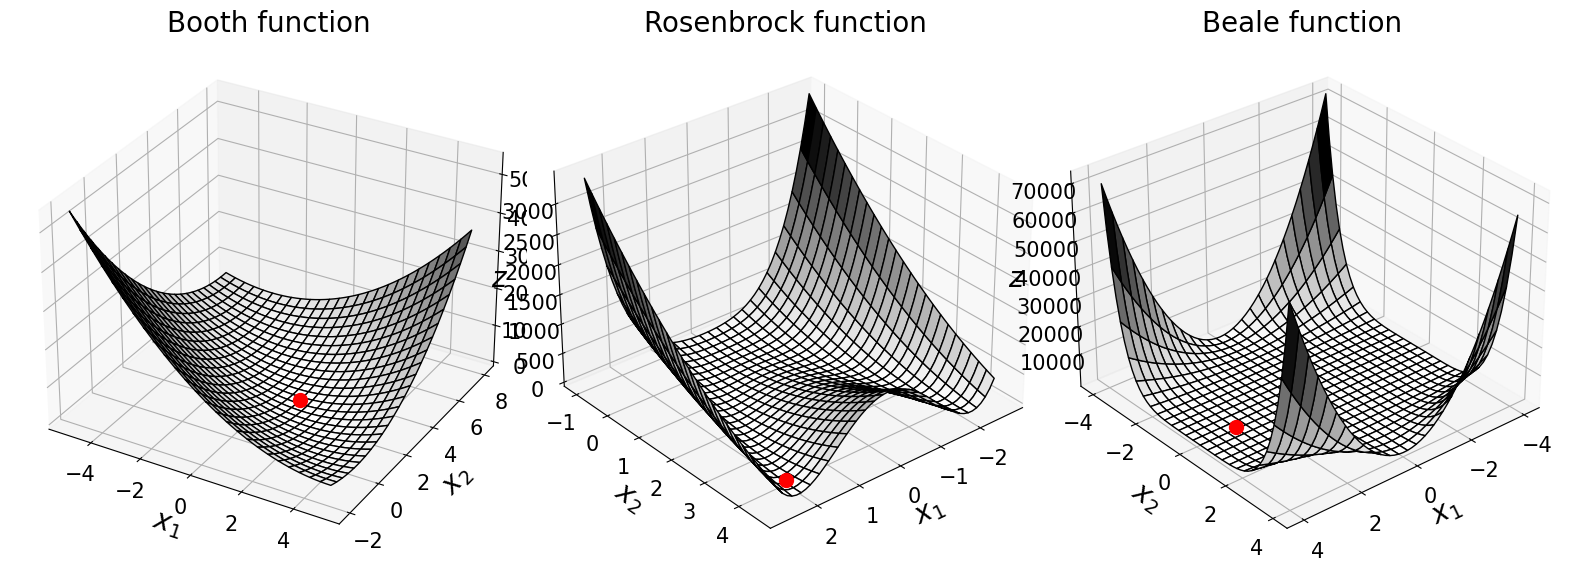

In [ ]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(131, projection="3d")
ax2 = fig.add_subplot(132, projection="3d")
ax3 = fig.add_subplot(133, projection="3d")

###############################################################################
# Booth Function
def f1(X):
    return (X[0]+2*X[1]-7)**2 + (2*X[0]+X[1]-5)**2

def df1(X):
    dx0 = 2*(X[0]+2*X[1]-7)+4*(2*X[0]+X[1]-5)
    dx1 = 4*(X[0]+2*X[1]-7)+2*(2*X[0]+X[1]-5)
    return np.array([dx0, dx1])



################################################################################
# Rosenbrock Function
def f2(X):
    """
    x    : (2,)인 2차원 ndarray 변수
    -----------------------------------------
    반환 : 로젠브록 함수값
    """
    return 50*(X[1]-X[0]**2)**2 + (2-X[0])**2

def df2(X):
    """
    x    : (2,)인 2차원 ndarray 변수
    -----------------------------------------
    반환 : 로젠브록 함수의 도함수 값
    """
    dx0 = -200*X[0]*(X[1]-X[0]**2)-2*(2-X[0])
    dx1 = 100*(X[1]-X[0]**2)
    return np.array([dx0, dx1])

################################################################################
# Beale Functon
def f3(X):
    return (1.5-X[0]+X[0]*X[1])**2 + (2.25-X[0]+X[0]*X[1]**2)**2 + (2.625-X[0]+X[0]*X[1]**3)**2

def df3(X):
    dx1 = 2*(1.5-X[0]+X[0]*X[1])*(X[1]-1) + 2*(2.25-X[0]+X[0]*X[1]**2)*(X[1]**2-1) + 2*(2.625-X[0]+X[0]*X[1]**3)*(X[1]**3-1)
    dx2 = 2*(1.5-X[0]+X[0]*X[1])*X[0] + 2*(2.25-X[0]+X[0]*X[1]**2)*2*X[0]*X[1] + 2*(2.625-X[0]+X[0]*X[1]**3)*3*X[0]*X[1]**2

    # by sympy for verification
    # dX1 = 2.0*X[0]*X[1]**6 + 2.0*X[0]*X[1]**4 - 4.0*X[0]*X[1]**3 - 2.0*X[0]*X[1]**2 - 4.0*X[0]*X[1] + 6.0*X[0] + 5.25*X[1]**3 + 4.5*X[1]**2 + 3.0*X[1] - 12.75
    # dX2 = X[0]*( 6.0*X[0]*X[1]**5 + 4.0*X[0]*X[1]**3 - 6.0*X[0]*X[1]**2 - 2.0*X[0]*X[1] - 2.0*X[0] + 15.75*X[1]**2 + 9.0*X[1] + 3.0 )

    return np.array([dx1, dx2])

x1 = np.linspace(-5, 5, 51)
x2 = np.linspace(-2, 8, 51)
X1, X2 = np.meshgrid(x1, x2)
ax1.plot_surface(X1, X2, f1(np.array([X1,X2])), cmap=plt.cm.binary, edgecolor="k")
ax1.plot3D([1], [3], f1([1,3]), 'o', color='r', markersize=10, zorder=20)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15)
ax1.zaxis.set_tick_params(labelsize=15)
ax1.set_xlabel(r'$x_1$', fontsize=20)
ax1.set_ylabel(r'$x_2$', fontsize=20)
ax1.set_zlabel(r'$z$', fontsize=20)
ax1.set_title('Booth function', fontsize=20)

x1 = np.linspace(-2.7, 2.7, 51)
x2 = np.linspace(-1, 4.5, 51)
X1, X2 = np.meshgrid(x1, x2)
ax2.plot_surface(X1, X2, f2([X1, X2]), cmap=plt.cm.binary, edgecolor="k")
ax2.plot3D([2], [4], f2([2,4]), 'o', color='r', markersize=10, zorder=20)
ax2.xaxis.set_tick_params(labelsize=15)
ax2.yaxis.set_tick_params(labelsize=15)
ax2.zaxis.set_tick_params(labelsize=15)
ax2.set_xlabel(r'$x_1$', fontsize=20)
ax2.set_ylabel(r'$x_2$', fontsize=20)
ax2.set_zlabel(r'$z$', fontsize=20)
ax2.set_title('Rosenbrock function', fontsize=20)
ax2.view_init(30, 50)

x1 = np.linspace(-4, 4, 51)
x2 = np.linspace(-4, 4, 51)
X1, X2 = np.meshgrid(x1, x2)
ax3.plot_surface(X1, X2, f3([X1, X2]), cmap=plt.cm.binary, edgecolor="k")
ax3.plot3D([3], [0.5], f2([3,0.5]), 'o', color='r', markersize=10, zorder=20)
ax3.xaxis.set_tick_params(labelsize=15)
ax3.yaxis.set_tick_params(labelsize=15)
ax3.zaxis.set_tick_params(labelsize=15)
ax3.set_xlabel(r'$x_1$', fontsize=20)
ax3.set_ylabel(r'$x_2$', fontsize=20)
ax3.set_zlabel(r'$z$', fontsize=20)
ax3.set_title('Beale function', fontsize=20)
ax3.view_init(30, 50)

plt.subplots_adjust(wspace=0, hspace=0)

plt.show()


## 최속강하법

이제 경사도벡터를 사용하는 가장 간단한 알고리즘인 최속강하법을 만들어봅니다.

In [ ]:
def SDM(f, df, x, eps=1.0e-6, max_iter=1000, callback=None):
    """
    f       : 최적화 할 함수
    df      : 최적화할 함수의 도함수
    eps     : 정기 기준
    max_iter: 최대 반복수
    callback: x에 대한 기록을 위한 콜백함수
    """
    # [1] 반복 횟수 k=0으로 설정(파이썬에서는 for in문을 써서 따로 설정 필요없음)
    for k in range(max_iter):
        ########################################################################
        # WRITE YOUR CODE HERE[+]
        # 경사도벡터 계산: c^(k) = ∇f(x^(k))를 계산
        c = df(x)


        # [3] 수렴판정: c^(k)<ϵ이면 x^*=x^(k)로 두고 정지, 아니면 단계를 계속 진행
        if np.linalg.norm(c) < eps :
            print("Stop criterion break Iter.: {:5d}, x: {}".format(k, x))
            break

        ########################################################################
        # WRITE YOUR CODE HERE[+]
        # [4] 강하방향 설정: d^(k)=-c^(k)
        d = -c


        # [5] 이동거리 계산
        # d^(k)를 따라 f(α)=f(x^(k)+α*d^(k))를 최소화하는 α_k를 계산
        alpha = gss(f, df, x, d, delta=1.0e-3)[0]

        ########################################################################
        # WRITE YOUR CODE HERE[+]
        # [6] 업데이트
        # x^(k+1)=(x^(k)+α_k*d^(k)로 변수를 업데이트 한다.
        x = x + alpha*d

        # 외부함수를 실행 알고리즘과는 상관없고 사용자에 따라
        # 실행하고 싶은 작업이 있으면 callback함수로 실행시키기 위함
        if callback :
            callback(x.copy())
    else:
        print("Stop max iter:{:5d} x:{}".format(k, x))



### Booth function에 대한 실험

In [ ]:
###############################################
# 이 코드의 결과는 아래처럼 나와야 합니다.
# Stop criterion break Iter.:    55, x: [1. 3.]

x = np.array([0, 4.5])

SDM(f1, df1, x)

Stop criterion break Iter.:    55, x: [1. 3.]


### Booth function에 대한 경로

Stop criterion break Iter.:    55, x: [1. 3.]


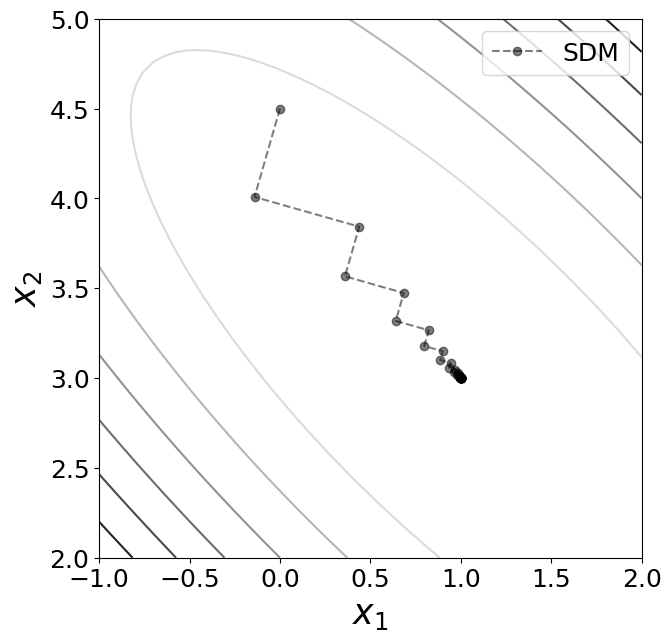

In [ ]:
x = np.array([0., 4.5])

# 반복 히스토리를 저장할 전역변수와 콜백함수
sdm_path = [x.copy(), ]
def record_sdm(xk) :
    global sdm_path
    sdm_path.append(xk)

SDM(f1, df1, x, callback=record_sdm)

fig = plt.figure(figsize=(7, 7))
ax = plt.axes()

sdm_path = np.array(sdm_path)

x1 = np.linspace(-1, 2, 51)
x2 = np.linspace(2, 5, 51)
X1, X2 = np.meshgrid(x1, x2)

ax.contour(X1, X2, f1(np.array([X1,X2])), cmap=plt.cm.binary, linestyles="solid")
ax.plot(sdm_path[:,0], sdm_path[:,1], 'o--', alpha=0.5, color='k', label='SDM')
ax.legend(fontsize=18)

ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_xlabel(r'$x_1$', fontsize=25)
ax.set_ylabel(r'$x_2$', fontsize=25)
ax.grid(False)


plt.show()
fig.savefig("sdm.png", dpi=150, bbox_inches='tight')